# Example of the aitlas toolbox in the context of image segmentation

## Import required packages

In [ ]:
from aitlas.datasets import HollsteinDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 58


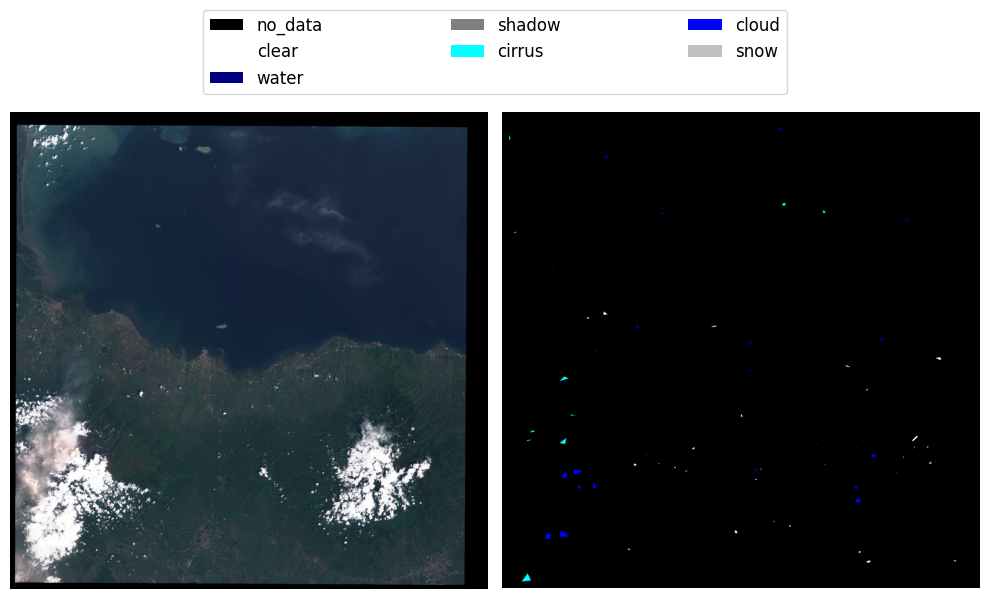

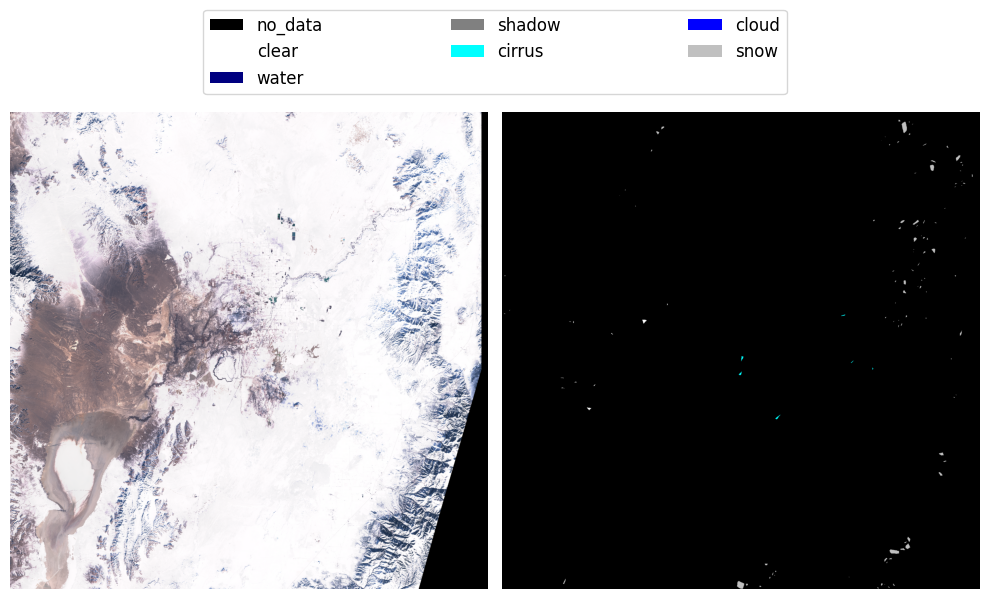

In [16]:
dataset_config = {
    "data_dir": "/home/dragik/data/Hollstein/hollstein_old",
    "selection":"rgb"
}
dataset = HollsteinDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(4);
dataset.show_image(18);

In [17]:
dataset.data_distribution_table()

,Number of pixels
no_data,190722787.0
clear,114135.0
water,46789.0
shadow,12099.0
cirrus,55029.0
cloud,53338.0
snow,69666.0


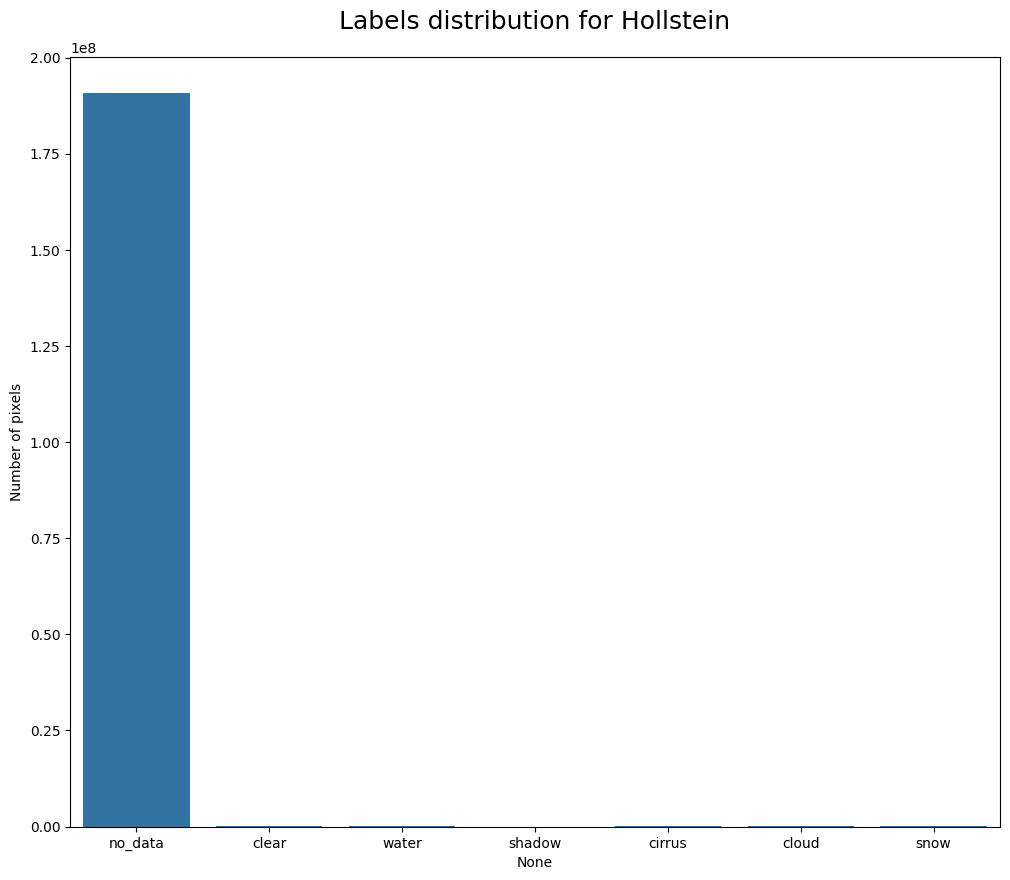

In [18]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [19]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "data_dir": "/home/dragik/data/Hollstein/hollstein_old",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = HollsteinDataset(train_dataset_config)
len(train_dataset)

58

## Create the model

In [20]:
epochs = 5
model_directory = "/home/dragik/data/Hollstein/hollsttein_old/experiments_rgb"
model_config = {
    "num_classes": 7, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [21]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:29<00:00,  1.96s/it]

epoch: 1, time: 30, loss:  0.78902



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:24<00:00,  1.66s/it]

IOU:0.03464434795255136, IOU mean:0.013593077035518045, IOU per Class:[9.51196191e-02 8.46198453e-06 3.36859774e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.00895612e-05]



training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:26<00:00,  1.76s/it]

epoch: 2, time: 26, loss:  0.74821



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:23<00:00,  1.57s/it]

IOU:0.4940988245918965, IOU mean:0.09571918348494468, IOU per Class:[6.70026956e-01 2.40817044e-06 4.92018234e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]



training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:24<00:00,  1.66s/it]

epoch: 3, time: 25, loss:  0.71626



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:27<00:00,  1.84s/it]

IOU:0.7214347665064974, IOU mean:0.12029582406142272, IOU per Class:[0.84207077 0.         0.         0.         0.         0.
 0.        ]



training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:27<00:00,  1.82s/it]

epoch: 4, time: 27, loss:  0.68637



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:22<00:00,  1.52s/it]

IOU:0.4857764297394364, IOU mean:0.09671370067077019, IOU per Class:[6.76942991e-01 5.47975232e-06 2.68204372e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.06131378e-05]



training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:28<00:00,  1.91s/it]

epoch: 5, time: 28, loss:  0.65836



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:26<00:00,  1.79s/it]

IOU:0.6486689068959285, IOU mean:0.11580310220115456, IOU per Class:[8.10601185e-01 1.69846091e-05 3.54596097e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


Train loss: [0.8221489951528352, 0.7548540583972273, 0.7200475047374594, 0.7183632336813828, 0.6797150085712301]
Validation loss: []
Train time per epochs: [30, 26, 25, 27, 28]
Finished training. training time: 136


# Working with the 13 bands of Sentinel-2

## Load training data

In [7]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/Hollstein/hollstein_old",    
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = HollsteinDataset(train_dataset_config)
len(train_dataset)

58

## Create the model

In [8]:
epochs = 3
model_directory = "/home/dragik/data/Hollstein/hollstein_old/experiments_all_bands"
model_config = {
    "num_classes": 7, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [9]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|██████████████████████████████████████████████████████████████████████| 15/15 [1:15:37<00:00, 302.52s/it]

epoch: 1, time: 4538, loss:  0.73984



testing on train set: 100%|██████████████████████████████████████████████████████████| 15/15 [1:14:43<00:00, 298.93s/it]

IOU:0.03612044828862744, IOU mean:0.017025825106538925, IOU per Class:[1.19031702e-01 2.98129874e-05 0.00000000e+00 0.00000000e+00
 7.13300441e-05 7.68886135e-06 4.02418210e-05]



training: 100%|██████████████████████████████████████████████████████████████████████| 15/15 [1:14:35<00:00, 298.33s/it]

epoch: 2, time: 4475, loss:  0.65279



testing on train set: 100%|██████████████████████████████████████████████████████████| 15/15 [1:14:37<00:00, 298.47s/it]

IOU:0.521271615774985, IOU mean:0.1357458236114289, IOU per Class:[9.50178446e-01 3.98724083e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.44661187e-06 0.00000000e+00]



training: 100%|██████████████████████████████████████████████████████████████████████| 15/15 [1:14:35<00:00, 298.34s/it]

epoch: 3, time: 4475, loss:  0.61329



testing on train set: 100%|██████████████████████████████████████████████████████████| 15/15 [1:14:33<00:00, 298.24s/it]

IOU:0.777761507548102, IOU mean:0.13655111263173886, IOU per Class:[9.55852967e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.82171701e-06 0.00000000e+00]


Train loss: [0.9078545590926861, 0.6360634606460045, 0.589873823626288]
Validation loss: []
Train time per epochs: [4538, 4475, 4475]
Finished training. training time: 13488
